Stats CA2.1

Inferential Statistics - part 1

The company believes implemented new machines and they believe this would reduce the average overtime (in minutes) that the workers will do, which will lead to a cost reduction in the end. They tried it in a group of 200 workers, which shows an average overtime of 6300 minutes. Can we say that the company is right? Formulate an appropriate hypothesis and justify your answer.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("/Users/janet.xuishi/Documents/DA_L7/CA2.0_stats_garments_worker_productivity.csv")
#df.head()
#df.describe()

Logic:
We are to validate a garments manufacturing company’s claim that by implementation new machines in selected group of 200 employees help to reduce over time of the entire employees’ over time or not.

A quick examine this csv data file, we discovered the total number of workers is much larger than 200 workers (total population). 200(sample) is only a sample data. Experiment rang among 200 workers, we need to find out if the mean overtime is higher or lower than 6300 minutes to validate company’s claim of implementing the new machines is a success or failure to reduce overtime.

In [2]:
# Calculate the MEAN and STD of the overtime for the entire population
population_mean_overtime = round(df["over_time"].mean(),2)
population_std = round(df["over_time"].std(),2)
print(population_mean_overtime, population_std)

6508.21 2864.51


In [3]:
# Given the mean and std of the overtime of the sample (200 workers and the average overtime among 200 workers after new machines implementation )
sample_mean = 6300
sample_size = 200

In [4]:
# The standard error helps us understand how close the mean of our sample (200 workers) is to the mean of the entire population 
standard_error = round(population_std / (sample_size ** 0.5),2)
print(standard_error)

202.55


With standard error at 202.55 (sample mean of 200 worker), it still shows that there are variability of + and - of 202.55 of the entire population's mean.

Hypothesis: 

H0 New machines did NOT reduce the over time, before and after MEAN over time is the same, or greater than the old machines overtime.

H1 New machines reduced MEAN over time before, less than old machines MEAN over time.

In [5]:
#import scipy.stats libary
from scipy.stats import norm
#calulate z-score
z_score = ( sample_mean - population_mean_overtime) / ( population_std / ( sample_size ** 0.5 ))
print(f"z_score is: {z_score}")

#calulate p-value
p_value = 2 * norm.sf(abs(z_score))
print(f"p_value is: {p_value}")


z_score is: -1.027936386403616
p_value is: 0.30397975216140327


Conclusion:

Z-score is negative: -1.03, indicates that sample mean 6300 minutes is less than population mean.

P-value is 0.30 which is much higher than alpha level of 0.05, indicates the difference in mean overtime, we do NOT have sufficient evidence to reject H0. The data does NOT provide strong evidence to support company's claim that implementation of new machines was successful in reducing overtime. In the real manufacturing world, there are many factors to consider, we don't have enough evidence in this data file to reject H0 doesn't mean it's true. Implementation of new machines usually involves testing, production line halt due to errors or adjustment, worker operation fault etc, these data are not captured in this data file.


Stats CA2.2

Inferential Statistics - part 2

Formulate an appropriate analysis to determine the real average productivity of these workers each day of the week. Is there any difference between the days? Along with your results, provide a possible explanation on the outcome.


In [6]:
import numpy as np
import pandas as pd
df = pd.read_csv("/Users/janet.xuishi/Documents/DA_L7/CA2.0_stats_garments_worker_productivity.csv")
#df.head()

In [7]:
#Create a dictionary to store productivity of each day, group by the days
productivity_by_day = {}

for day in df["day"].unique():
    #extract productivity of the current day
    productivity_values = df[df["day"] == day]["actual_productivity"] 
    #store in a week day dictionary
    productivity_by_day[day] = productivity_values

In [8]:
# week day dictionary by the order
day_print_order = ["Monday", "Tuesday", "Wednesday","Thursday","Friday", "Saturday", "Sunday"]

In [9]:
#Create a dictionary to store average productivity of each day
average_productivity = {}

for day in day_print_order:
    if day in productivity_by_day:
        average_productivity[day] = round(productivity_by_day[day].mean(),4)
# Noticed we are missing Fridays in this csv data file
print(f"Average Productivity by Day: {average_productivity}") 

Average Productivity by Day: {'Monday': 0.7242, 'Tuesday': 0.7281, 'Wednesday': 0.7227, 'Thursday': 0.7108, 'Saturday': 0.7341, 'Sunday': 0.7135}


In [10]:
# Productivity by day
daily = list(average_productivity.values())
print(daily)
# The highest productivity day - the lowest productivity day in a week
range_diff = max(daily) - min(daily)
print(f"The daily productivity range difference is: {range_diff} in a week.")

[0.7242, 0.7281, 0.7227, 0.7108, 0.7341, 0.7135]
The daily productivity range difference is: 0.023299999999999987 in a week.


Average Productivity by Day:
Monday: 0.7242
Tuesday: 0.7281
Wednesday: 0.7227
Thursday: 0.7108
Friday: NULL
Saturday: 0.7341
Sunday: 0.7135

Based on above average productivity by day in a week, we can see the range of each day's productivity difference is at 0.0232, there are some differences, but small. 

Fridays are missing from the csv, we could assume Fridays are likely a standard day off of production teams, so maintenance/repair/upgrade departments could carry out routine tasks. Or employees could obtain training to upskill on new machines operation. 

Note: We don't have data to support our speculation that Friday is a day off for production teams in this company, if data is missing for Friday for any reason, it should be stated in the data file. As it can impact the analysis. 

/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


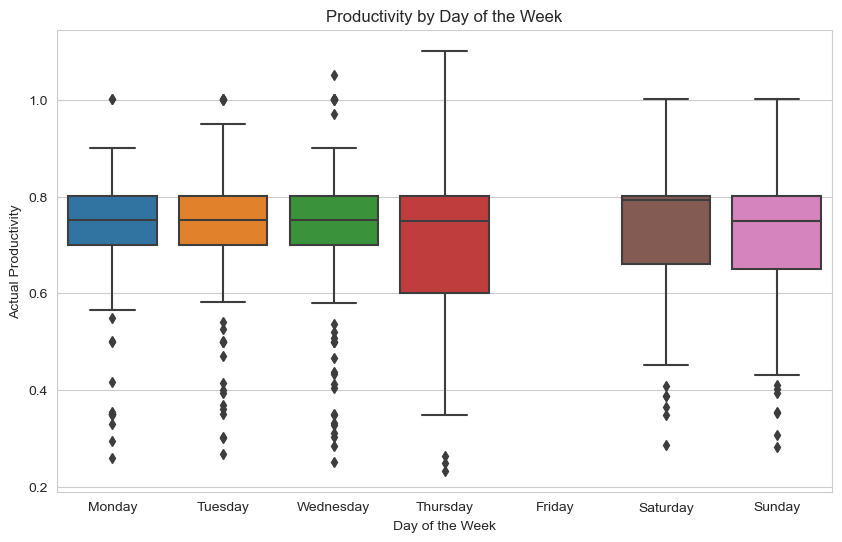

In [11]:
# Additionally we can use visualization to better demonstrate the difference:
# Create boxplot visualization 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize = (10,6))
sns.boxplot(x = "day", 
            y = "actual_productivity", 
            data = df, 
            order = ["Monday", "Tuesday", "Wednesday","Thursday","Friday", "Saturday", "Sunday"])

#title and labels for axes
plt.title("Productivity by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Actual Productivity")

plt.show()

Conclusion:
Based on numeric calculation and visual output, we can say there are difference between daily Actual Productivity of a week, however differences are small.

Regression Analysis - part 3

Use some variables of the dataset to perform regression analysis. You should identify the key variables that influence employee’s productivity.

In [12]:
import numpy as np
import pandas as pd
df = pd.read_csv("/Users/janet.xuishi/Documents/DA_L7/CA2.0_stats_garments_worker_productivity.csv")
#df.head()

In [13]:
# We need to select relevant columns to define our variables
var_columns = df.select_dtypes(include = [np.number]).columns.tolist()
var_columns.remove("actual_productivity")
print(var_columns)

['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']


In [14]:
# We are using numeric variables as potential predictors.
# X are indepent variables, y is the dependent variable
X = df[var_columns]
y = df["actual_productivity"]
# print(X,y)

In [15]:
# Import library
# We need to split the data into training and testing. 
# In this CA, we use 80% of data to train and 20% of data to test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
# Import library
# Create regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [17]:
# Plug in the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting value for the test set
y_pred = regressor.predict(X_test)

In [19]:
# Score the model based on the training data
training_score = regressor.score(X_train, y_train)

In [20]:
coefficients = regressor.coef_

In [21]:
# To list out the numeric variables as potential predictors: 
coeff_df = round(pd.DataFrame(coefficients, X.columns, columns = ["Coefficient"]),5)
print(coeff_df)

# print out training scores
print(f"The trained score is at: {training_score}")

                       Coefficient
team                      -0.00394
targeted_productivity      0.64915
smv                       -0.00319
wip                       -0.00000
over_time                 -0.00000
incentive                  0.00288
idle_time                  0.00034
idle_men                  -0.00741
no_of_style_change        -0.00046
no_of_workers              0.00122
The trained score is at: 0.8177377944594191


In [22]:
# Create visualization to better understand the major influence variables and minor influence variables

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")
# Create the Coefficient data frame for visualization
coeff_df = pd.DataFrame({
    "Variable": ["team",
                 "targeted_productivity",
                 "smv",
                 "wip",
                 "over_time",
                 "incentive",
                 "idle_time",
                 "idle_men",
                 "no_of_style_change",
                 "no_of_workers"
                ],
 "Coefficient": [-0.00394,
                0.64915,
                -0.00319,
                -0.00000,
                -0.00000,
                0.00288,
                0.00034,
                -0.00741,
                -0.00046,
                0.00122
                 ]
})

In [24]:
# Sort the Data Frame based on absolute value of coefficients for better visual presentation
coeff_df["abs_coefficient"] = coeff_df["Coefficient"].abs()
coeff_df = coeff_df.sort_values(by = "abs_coefficient", ascending = False)

/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


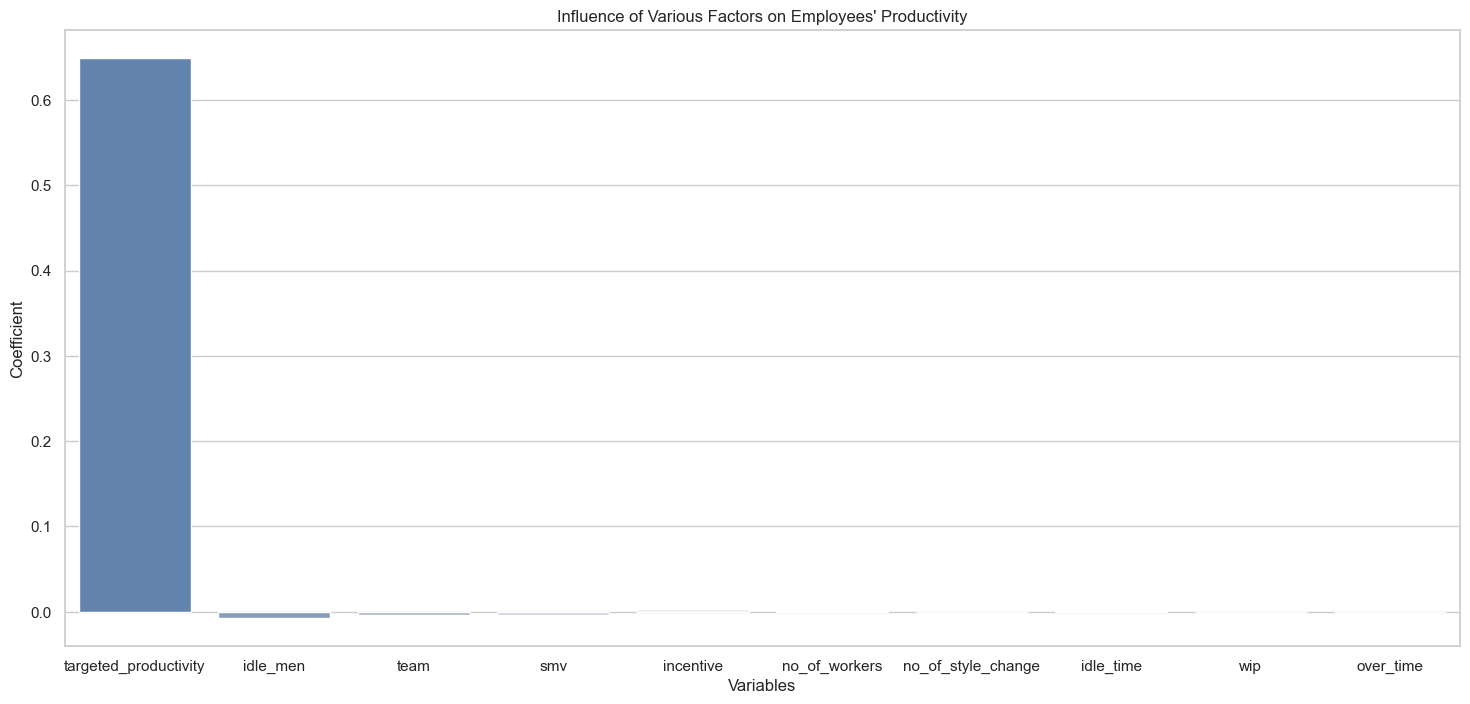

In [25]:
# Create a bar plot to have better visual interpretation of all numeric variables
plt.figure(figsize = (18,8))
sns.barplot(y = "Coefficient", 
            x = "Variable", data = coeff_df, palette = "vlag")
# Titles and labels definition 
plt.title("Influence of Various Factors on Employees' Productivity")
plt.ylabel("Coefficient")
plt.xlabel("Variables")
plt.show()

Conclusion of model:
The model trained score is at: 0.8177377944594191 ( 81.77% ), indicates model is doing a good job capturing variation in productivity based on given independent variables.

Coefficients results:
There are mix of positive and negative coefficient values, the "targeted_productivity" at 0.649 indicates a positive effect on productivity. Above visual is a strong interpretation of targeted productivity's impact.
The other positive coefficient values such as incentive at 0.00288, and number of workers at 0.00122, they are not as high as targeted productivity at 0.649 to significantly impact the actual productivity, however it should not be ignored in the real world.

Text(0, 0.5, 'Actual Productivity')

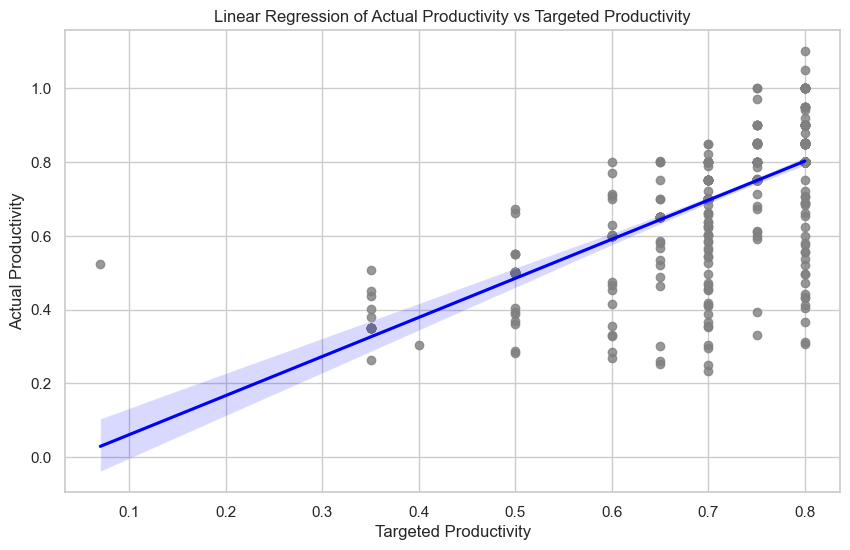

In [26]:
# Perform Regression Analysis use scatter plot to draw a regression line
plt.figure(figsize = (10,6))
sns.regplot(x = "targeted_productivity",
            y = "actual_productivity",
            data = df,
            scatter_kws = {"color": "grey"},
            line_kws = {"color": "blue"})
# Titles and labels definition 
plt.title("Linear Regression of Actual Productivity vs Targeted Productivity")
plt.xlabel("Targeted Productivity")
plt.ylabel("Actual Productivity")

Conclusion of Regression Analysis:
This scatter plot visualization shows the actual productivity vs targeted productivity. The grey dots are the different variables in the csv data file.The Regression blue line is pointing upwards, indicates a strong impact of targeted productivity on actual productivity between the targeted and actual productivity. 